<a href="https://colab.research.google.com/github/Tej-Singh-Rana/Adhocnetworks-Workshop/blob/master/webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Everyone knows the php.net site. All of us went there sooner or later,
 and will keep going back there. This is the central reference point for PHP
 users, and there is a wealth of information there. Not all of it is obvious.
 Come with me, I'll show you.

 This is the primary web site. The front page is where major news is published:
 new PHP versions, security updates, and new projects launched. This site is
 also mirrored in dozens of countries worldwide.

 This is the home of the download page, for
 everyone to get the latest version of the PHP source code and binaries
 for Windows. The current and next-to-current versions are available there.
 (There is also a PHP Museum, which has
 all of the source distributions since June 1996.)

 The next most visited section is the documentation.
 The documentation is translated into twelve different languages, and is
 available in a variety of different formats.
 Users are able to read notes on the documentation left by other users, and
 c

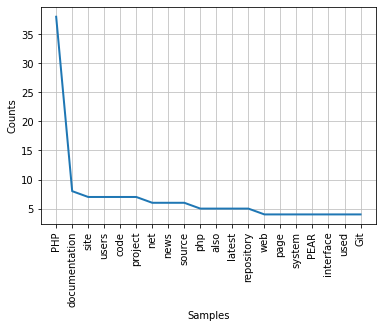

In [27]:
from urllib import request    # for downloading data from url 
from bs4  import BeautifulSoup   # for souping
import time
import re
import nltk
# pointing to URL link

url ='https://www.php.net/sites.php'

metadata=request.urlopen(url)    # taking a request for url link

# metadata.info()  # to get the info of given url link's site
# metadata.read()  # to read the data of given url link's site

soupdata=BeautifulSoup(metadata,'html5lib') 
# -------------------  html data,  html parser  ------------
# --------------------------------- html parser basically used to scrape html tags like h1,pre,a,p form.

# now selecting a particular tag to scrape data
scrapdata=soupdata.findAll('p')    # to find the html tag 'p' in given link's site, we can change it.

#print(scrapdata)   # to print the collected scrape data

# now converting collected scrape data into string format to easy to read.
# for i in scrapdata:
#   print(i.text)

mydata=""

for i in scrapdata:
  mydata += i.text

print(mydata)

# RegEx to filter data in more frequent way(important role).
# Applying RegEx expression to cleaning data
# import re (defined in top) 

clean_data=re.sub(r'\[[0-9]*\]',' ',mydata)       # This will remove 0 or more times number appearing in a mydata
clean_data=re.sub(r'\s+',' ',clean_data)          # It will remove one or more white spaces with single white spaces
clean_data=re.sub(r'[^a-zA-Z]',' ',clean_data)    # It will remove single char from starting of the line
clean_data=re.sub(r'\s+',' ',clean_data)
print(clean_data)

# now dealing with strings

newdata = clean_data.split()

# for words in newdata:
#   print(words)
#   time.sleep(1)

# Now dealing with data by using NLTK (Natural Language Tool Kit)

# To install NLTK package
# In jupyter !pip install nltk
# import nltk  (defined in top)

# Downloading all dictonary for computer
#nltk.download('all')
# After nltk packages download complete, comment it or remove it statement otherwise it will download again. 
# Removing stopwords (stopwords :- that's unrelavant keywords which are not meaningful or stopping to search actual keyword of NLP process.
# not a meaningful keywords, used in everytime for a example :-> a,the,an,is,are,they)

actualdata = []
from nltk.corpus import stopwords
for i in newdata:
  if i.lower() not in stopwords.words('english'):
    actualdata.append(i)
    
print(actualdata)
freq_data=nltk.FreqDist(actualdata)
freq_data.plot(20)


